In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plotly
import plotly.express as px

In [3]:
appr_data = pd.read_csv('~/Downloads/accepted_2007_to_2018Q4.csv.gz', compression='gzip')
rej_data = pd.read_csv('~/Downloads/rejected_2007_to_2018Q4.csv.gz', compression='gzip')
print(rej_data)
print(appr_data)

/var/folders/8g/rj5x5zgx5_d0pj8pq4ch7vqh0000gn/T/ipykernel_4456/105688895.py:1: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types. Specify dtype option on import or set low_memory=False.
  appr_data = pd.read_csv('~/Downloads/accepted_2007_to_2018Q4.csv.gz', compression='gzip')


          Amount Requested Application Date                        Loan Title  \
0                   1000.0       2007-05-26  Wedding Covered but No Honeymoon   
1                   1000.0       2007-05-26                Consolidating Debt   
2                  11000.0       2007-05-27       Want to consolidate my debt   
3                   6000.0       2007-05-27                           waksman   
4                   1500.0       2007-05-27                            mdrigo   
...                    ...              ...                               ...   
27648736           10000.0       2016-12-31                Debt consolidation   
27648737           10000.0       2016-12-31                            moving   
27648738            1200.0       2016-12-31                             Other   
27648739           25000.0       2016-12-31                debt_consolidation   
27648740           15000.0       2016-12-31                          Business   

          Risk_Score Debt-T

In [4]:
rej_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27648741 entries, 0 to 27648740
Data columns (total 9 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Amount Requested      float64
 1   Application Date      object 
 2   Loan Title            object 
 3   Risk_Score            float64
 4   Debt-To-Income Ratio  object 
 5   Zip Code              object 
 6   State                 object 
 7   Employment Length     object 
 8   Policy Code           float64
dtypes: float64(3), object(6)
memory usage: 1.9+ GB


In [8]:
appr_data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'disbursement_method', 'debt_settlement_flag',
       'debt_settlement_flag_date', 'settlement_status', 'settlement_date',
       'settlement_amount', 'settlement_percentage', 'settlement_term'],
      dtype='object', length=151)

In [32]:
borr_cols = ['issue_d','funded_amnt','loan_amnt','term','loan_status','int_rate','grade','sub_grade','acc_now_delinq','addr_state','application_type','annual_inc','emp_length','dti','dti_joint','title','zip_code']
borr_data = appr_data[borr_cols]
print(borr_data)

          issue_d  funded_amnt  loan_amnt        term  loan_status  int_rate  \
0        Dec-2015       3600.0     3600.0   36 months   Fully Paid     13.99   
1        Dec-2015      24700.0    24700.0   36 months   Fully Paid     11.99   
2        Dec-2015      20000.0    20000.0   60 months   Fully Paid     10.78   
3        Dec-2015      35000.0    35000.0   60 months      Current     14.85   
4        Dec-2015      10400.0    10400.0   60 months   Fully Paid     22.45   
...           ...          ...        ...         ...          ...       ...   
2260696  Oct-2016      40000.0    40000.0   60 months      Current     10.49   
2260697  Oct-2016      24000.0    24000.0   60 months  Charged Off     14.49   
2260698  Oct-2016      14000.0    14000.0   60 months      Current     14.49   
2260699       NaN          NaN        NaN         NaN          NaN       NaN   
2260700       NaN          NaN        NaN         NaN          NaN       NaN   

        grade sub_grade  acc_now_delinq

<Axes: xlabel='loan_amnt'>

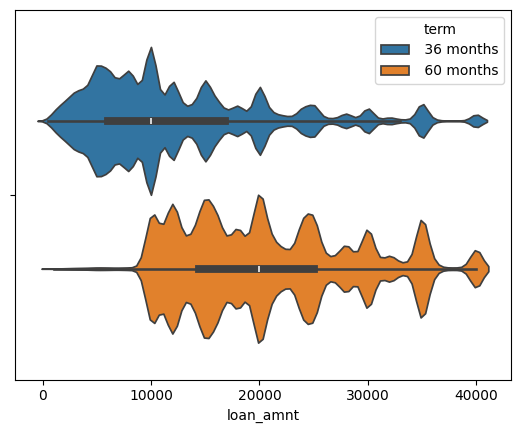

In [10]:
sns.violinplot(data=borr_data,x='loan_amnt',hue='term')

In [33]:
borr_data['is_delinquent'] = borr_data['loan_status'].isin(['Late (31-120 days)', 'Late (16-30 days)', 'Charged Off', 'Default'])


/var/folders/8g/rj5x5zgx5_d0pj8pq4ch7vqh0000gn/T/ipykernel_4456/3362464652.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  borr_data['is_delinquent'] = borr_data['loan_status'].isin(['Late (31-120 days)', 'Late (16-30 days)', 'Charged Off', 'Default'])


<Axes: xlabel='loan_amnt'>

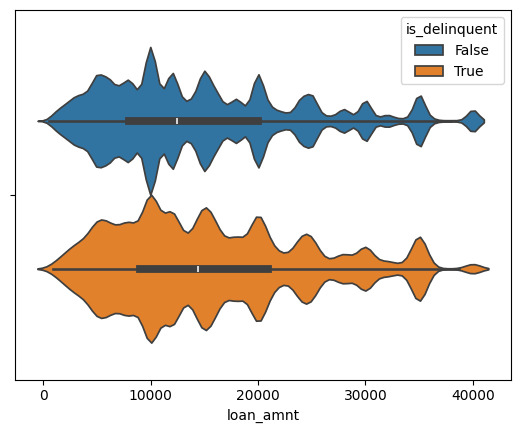

In [15]:
sns.violinplot(data=borr_data,x='loan_amnt',hue='is_delinquent')

<Axes: xlabel='loan_amnt', ylabel='Density'>

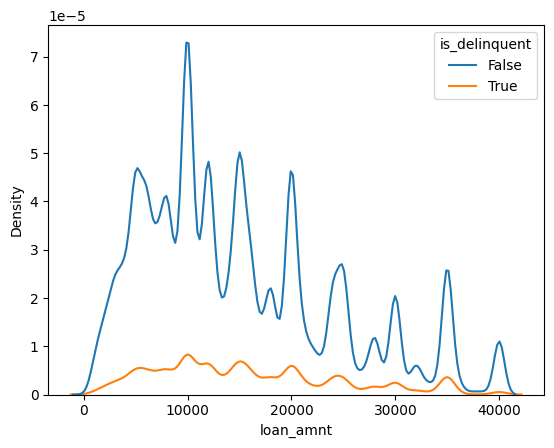

In [16]:
sns.kdeplot(data=borr_data,x='loan_amnt',hue='is_delinquent')

<Axes: xlabel='is_delinquent', ylabel='emp_length'>

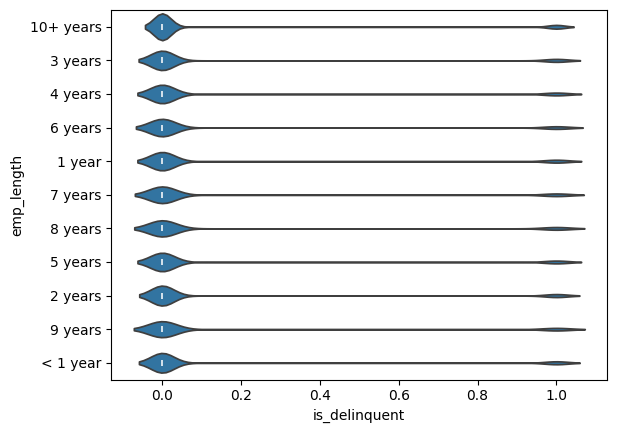

In [18]:
sns.violinplot(data=borr_data,x='is_delinquent',y='emp_length')

In [34]:
borr_data['loan_year'] = pd.to_datetime(borr_data['issue_d']).dt.year

/var/folders/8g/rj5x5zgx5_d0pj8pq4ch7vqh0000gn/T/ipykernel_4456/4064898342.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  borr_data['loan_year'] = pd.to_datetime(borr_data['issue_d']).dt.year
/var/folders/8g/rj5x5zgx5_d0pj8pq4ch7vqh0000gn/T/ipykernel_4456/4064898342.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  borr_data['loan_year'] = pd.to_datetime(borr_data['issue_d']).dt.year


<Axes: xlabel='loan_year', ylabel='int_rate'>

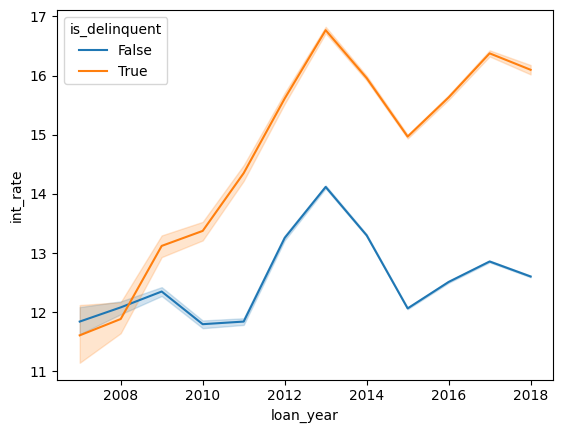

In [26]:
sns.lineplot(data=borr_data, x='loan_year', y='int_rate',hue='is_delinquent')

/var/folders/8g/rj5x5zgx5_d0pj8pq4ch7vqh0000gn/T/ipykernel_4456/1644273792.py:3: FutureWarning:

The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior



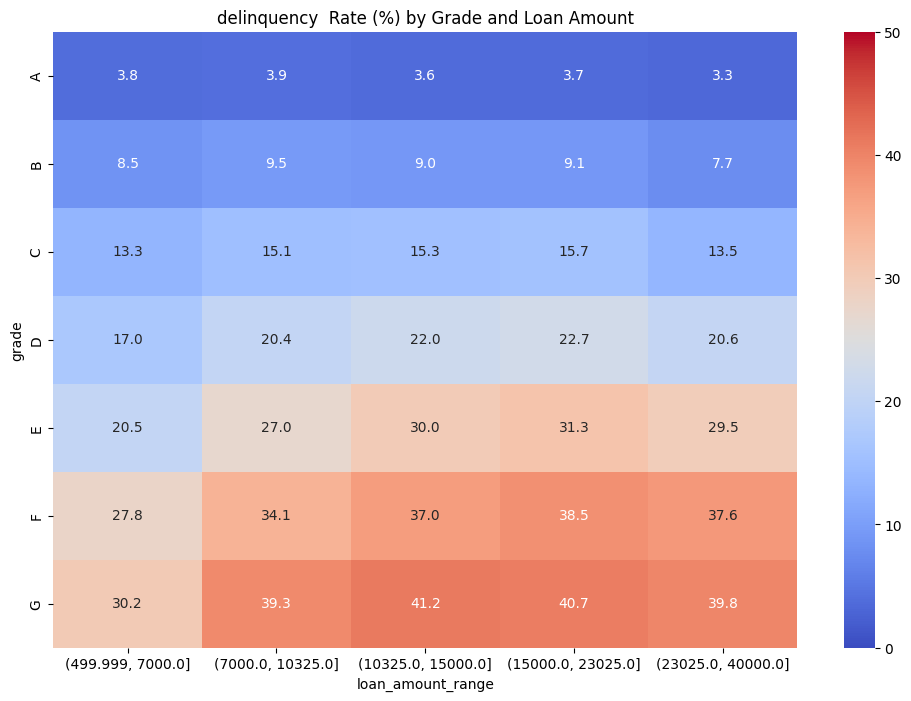

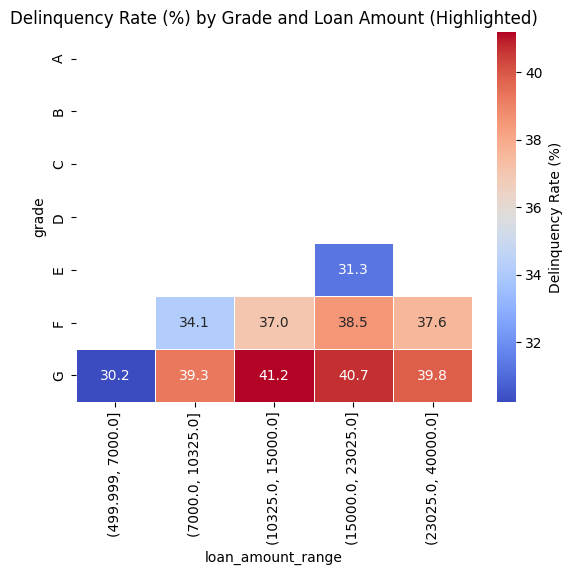

In [48]:
# 5. Delinquency odds viz
plt.figure(figsize=(12, 8))
delinq_matrix = borr_data.pivot_table(
    values='is_delinquent',
    index='grade',
    columns='loan_amount_range',
    aggfunc='mean'
) * 100
mask = delinq_matrix > 30
sns.heatmap(delinq_matrix, annot=True, fmt='.1f', cmap='coolwarm',vmin=0, vmax=50)
plt.title('delinquency  Rate (%) by Grade and Loan Amount')
plt.show()
sns.heatmap(delinq_matrix, annot=True, fmt='.1f', cmap='coolwarm', linewidths=0.5,
            cbar_kws={'label': 'Delinquency Rate (%)'}, mask=~mask, edgecolor='black')
plt.title('Delinquency Rate (%) by Grade and Loan Amount (Highlighted)')
plt.show()

Note: Delinquency rates increase with grade and loan size due to lower borrower creditworthiness and repayment capacity.


In [47]:
import plotly.express as px
# Convert IntervalIndex to strings
delinq_matrix.columns = delinq_matrix.columns.astype(str)
delinq_matrix.index = delinq_matrix.index.astype(str)
fig = px.imshow(delinq_matrix, 
                labels=dict(x="Loan Amount Range", y="Grade", color="Delinquency Rate (%)"),
                x=delinq_matrix.columns, 
                y=delinq_matrix.index,
                color_continuous_scale='RdBu',
                text_auto=True)
fig.update_layout(title='Interactive Delinquency Rate by Grade and Loan Amount')
fig.show()


Analysing the data further to see if there's any relation between loan grade and dti/annual income. I'm expecting that the loans with lower grade have lower repayment capacity which reflects in the delinquency rates.

In [ ]:
# Filter necessary columns
repayment_capacity_data = borr_data[['grade', 'dti', 'annual_inc']].dropna()

# Optional: Remove outliers
repayment_capacity_data = repayment_capacity_data[
    (repayment_capacity_data['annual_inc'] < 500000) & (repayment_capacity_data['dti'] < 50)
]
repayment_stats = repayment_capacity_data.groupby('grade').agg({'dti':'mean','annual_inc':'mean'}).reset_index()
print(repayment_stats)


  grade        dti    annual_inc
0     A  15.922962  87728.052501
1     B  17.566785  77259.229771
2     C  19.032872  73441.570173
3     D  20.333629  70314.909100
4     E  20.991904  71148.752526
5     F  21.208761  72222.368133
6     G  21.500808  74728.471534


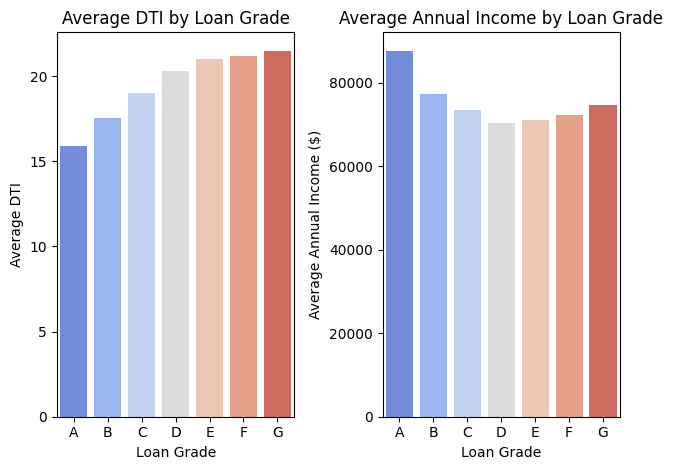

In [57]:
plt.subplot(1, 2, 1)
sns.barplot(data=repayment_stats, x='grade', y='dti', palette='coolwarm',hue='grade',legend='auto')
plt.title('Average DTI by Loan Grade')
plt.xlabel('Loan Grade')
plt.ylabel('Average DTI')

# Plot for Annual Income
plt.subplot(1, 2, 2)
sns.barplot(data=repayment_stats, x='grade', y='annual_inc', palette='coolwarm',hue='grade',legend='auto')
plt.title('Average Annual Income by Loan Grade')
plt.xlabel('Loan Grade')
plt.ylabel('Average Annual Income ($)')

plt.tight_layout()
plt.show()

The above chart shows that DTI increases with loan grade depreciation and annual income goes down too. Interesting the loan grades E,F,G have similar mean annual income and DTI. This makes it clear that higher loan values for grade E,F & G and inherently risky due to their lower repayment capacity.

Going to do more analysis to find out which loan requests have more success rate in getting funded.

/var/folders/8g/rj5x5zgx5_d0pj8pq4ch7vqh0000gn/T/ipykernel_4456/146121036.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/8g/rj5x5zgx5_d0pj8pq4ch7vqh0000gn/T/ipykernel_4456/146121036.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



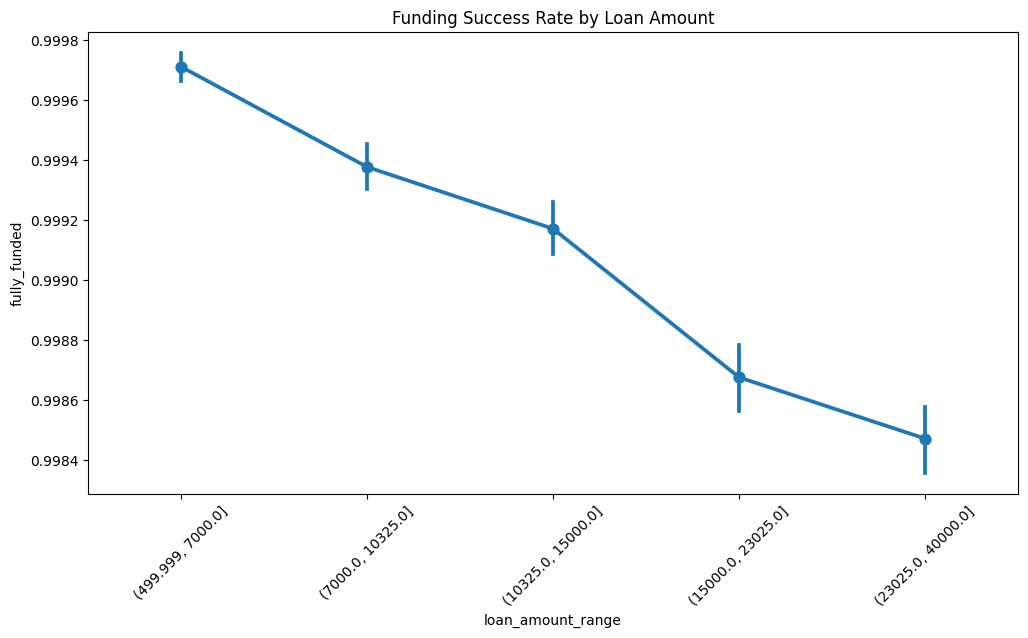

/var/folders/8g/rj5x5zgx5_d0pj8pq4ch7vqh0000gn/T/ipykernel_4456/146121036.py:16: FutureWarning:

The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior



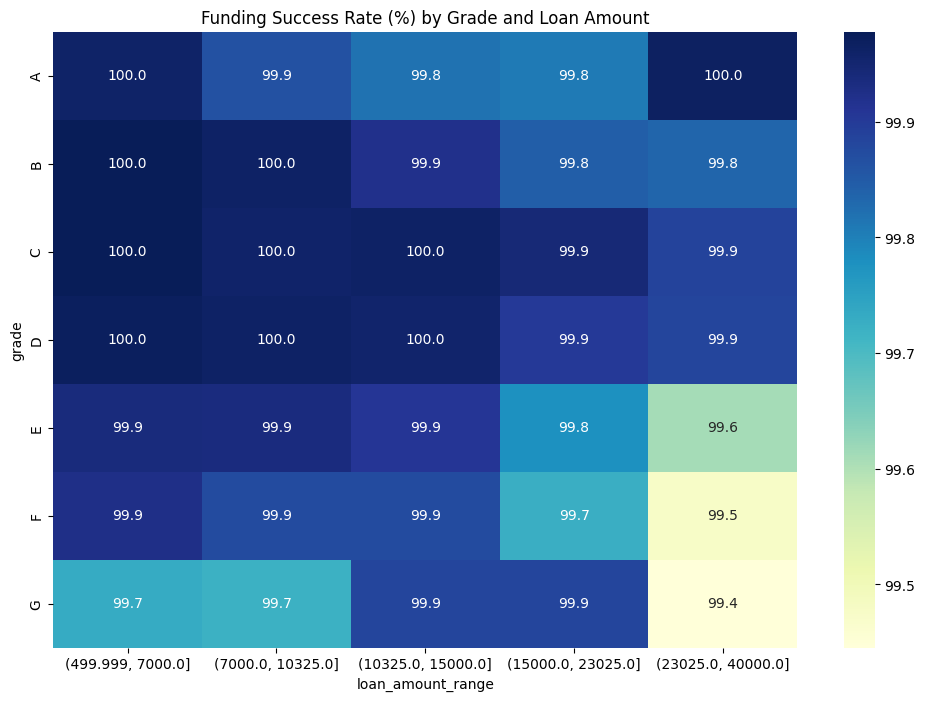

In [58]:
# 1. Funding Success Analysis
# Create funding success metric
borr_data['loan_amount_range'] = pd.qcut(borr_data['loan_amnt'], q=5)

borr_data['fully_funded'] = borr_data['funded_amnt'] >= borr_data['loan_amnt']

# Analyze funding success by amount range
plt.figure(figsize=(12, 6))
sns.pointplot(x='loan_amount_range', y='fully_funded', data=borr_data)
plt.xticks(rotation=45)
plt.title('Funding Success Rate by Loan Amount')
plt.show()

# 2. Approval Odds Visualization
plt.figure(figsize=(12, 8))
approval_matrix = borr_data.pivot_table(
    values='fully_funded',
    index='grade',
    columns='loan_amount_range',
    aggfunc='mean'
) * 100

sns.heatmap(approval_matrix, annot=True, fmt='.1f', cmap='YlGnBu')
plt.title('Funding Success Rate (%) by Grade and Loan Amount')
plt.show()


Looking at the heatmap it is evident that the all the loan grades have near 100% funding, it's looking more like if the loan is approved, funding will be secured fully. Let's look at the rejected loans to see if we can draw any insights on what drives the rejection.

/var/folders/8g/rj5x5zgx5_d0pj8pq4ch7vqh0000gn/T/ipykernel_4456/3906026932.py:6: FutureWarning:

The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior



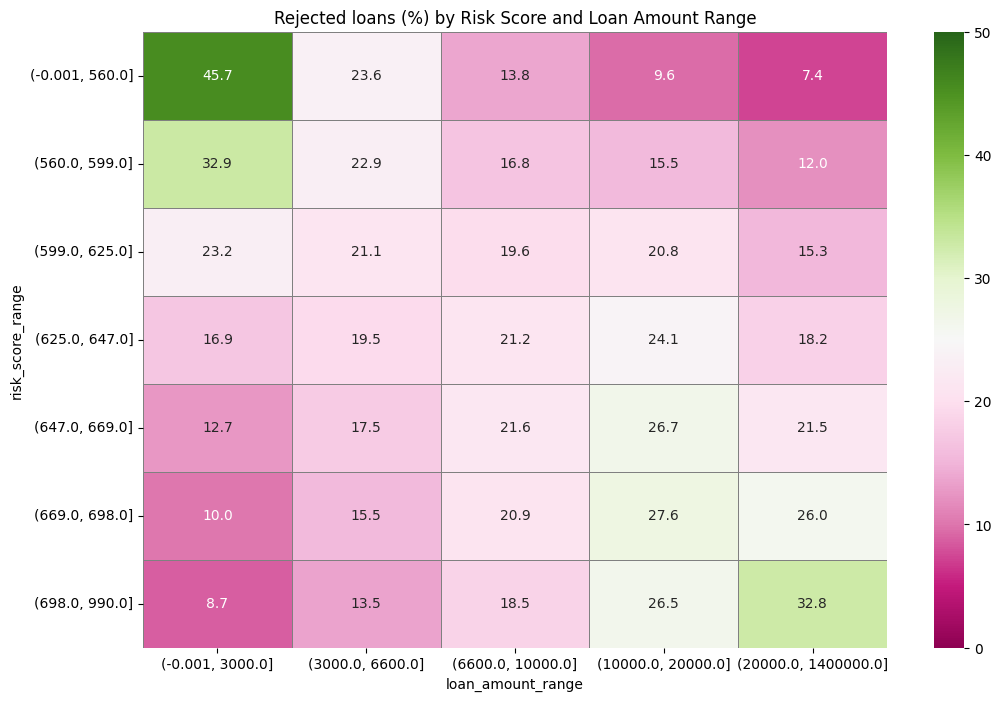

In [63]:
#Number of Rejected loans viz
rej_data['loan_amount_range'] = pd.qcut(rej_data['Amount Requested'], q=5)
rej_data['risk_score_range'] = pd.qcut(rej_data['Risk_Score'], q=7)

plt.figure(figsize=(12, 8))
rej_matrix = rej_data.pivot_table(
    values='Amount Requested',
    index='risk_score_range',
    columns='loan_amount_range',
    aggfunc='count'
) * 100
rej_matrix = rej_matrix.div(rej_matrix.sum(axis=1), axis=0) * 100
plt.xlabel('Loan Amount Range (Binned)')
plt.ylabel('Risk Score (Binned)')

#mask = delinq_matrix > 30
sns.heatmap(rej_matrix, annot=True, fmt='.1f', cmap='PiYG',vmin=0, vmax=50,linewidths=0.5, linecolor='gray')
plt.title('Rejected loans (%) by Risk Score and Loan Amount Range')
plt.show()
#sns.heatmap(delinq_matrix, annot=True, fmt='.1f', cmap='coolwarm', linewidths=0.5,
#            cbar_kws={'label': 'Delinquency Rate (%)'}, mask=~mask, edgecolor='black')
#plt.title('Rejected Counts by Grade and Loan Amount (Highlighted)')
#plt.show()

    It's evident from the above heat map that higher chance of loan rejections for requestors with less than 625 Risk Score even though the loan amount is significantly low. Better the score lower the rejection rate until the requested amount is less than 10K. Beyod 10K rejections creep up even with better score.

One has a better chance of getting approved by having Risk score over 625, higher the better as long as the loan amount is less than 10K. Better score with lower loan amounts see really low rejection levels.

In [73]:
# Filter necessary columns
dti_data = rej_data[['risk_score_range', 'Debt-To-Income Ratio']].dropna()
dti_data['Debt-To-Income Ratio'] = dti_data['Debt-To-Income Ratio'].str.replace('%','').astype('float')
print(dti_data)
dti_stats = dti_data.groupby('risk_score_range').agg({'Debt-To-Income Ratio':'mean'}).reset_index()
print(dti_stats)

         risk_score_range  Debt-To-Income Ratio
0          (669.0, 698.0]                 10.00
1          (698.0, 990.0]                 10.00
2          (698.0, 990.0]                 10.00
3          (669.0, 698.0]                 38.64
4         (-0.001, 560.0]                  9.43
...                   ...                   ...
27648733   (669.0, 698.0]                 55.15
27648734  (-0.001, 560.0]                 31.31
27648736   (560.0, 599.0]                 41.26
27648738   (669.0, 698.0]                 10.26
27648740   (669.0, 698.0]                 10.58

[9151111 rows x 2 columns]
  risk_score_range  Debt-To-Income Ratio
0  (-0.001, 560.0]            263.456176
1   (560.0, 599.0]            108.458025
2   (599.0, 625.0]             99.739403
3   (625.0, 647.0]            111.249549
4   (647.0, 669.0]            142.616838
5   (669.0, 698.0]            179.511308
6   (698.0, 990.0]            277.990988


/var/folders/8g/rj5x5zgx5_d0pj8pq4ch7vqh0000gn/T/ipykernel_4456/3385732846.py:5: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



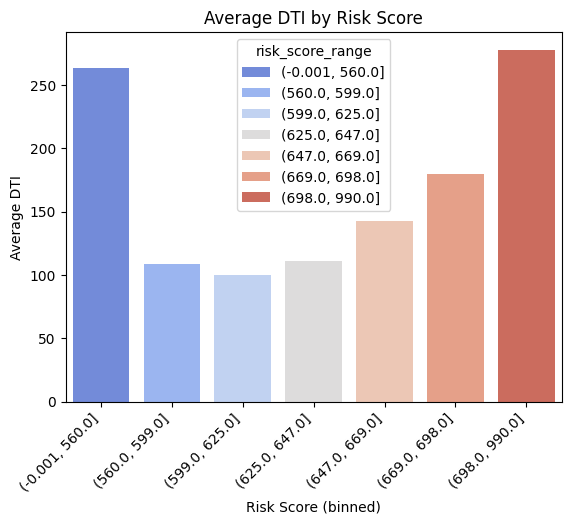

In [77]:
sns.barplot(data=dti_stats, x='risk_score_range', y='Debt-To-Income Ratio', palette='coolwarm',hue='risk_score_range',legend='auto')
plt.title('Average DTI by Risk Score')
plt.xlabel('Risk Score (binned)')
plt.ylabel('Average DTI')
plt.xticks(rotation=45, ha='right')
plt.show()

DTI variation by Risk score explains why the rejections peak at lower scores as they have humungous DTI and similarly the better risk score profiles carry heavy debt too which could be the reason why larger loan amounts are getting rejected here.
